In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualizing data
import seaborn as sns # visualizing data with stunning default theme
import sklearn # contain algorithms
import warnings
warnings.filterwarnings('ignore')

# load dataset from input directory
df = pd.read_csv("./Dataset/cv-valid-train.csv") 
df[df['age'].notna()].head()

,filename,text,up_votes,down_votes,age,gender,accent,duration
5,cv-valid-train/sample-000005.mp3,a shepherd may like to travel but he should ne...,1,0,twenties,female,us,NaN
8,cv-valid-train/sample-000008.mp3,put jackie right on the staff,3,0,seventies,male,us,NaN
13,cv-valid-train/sample-000013.mp3,but he had found a guide and didn't want to mi...,1,0,thirties,female,us,NaN
14,cv-valid-train/sample-000014.mp3,as they began to decorate the hallway a silhou...,1,0,sixties,male,england,NaN
19,cv-valid-train/sample-000019.mp3,then they got ahold of some dough and went goofy,1,0,fifties,male,australia,NaN


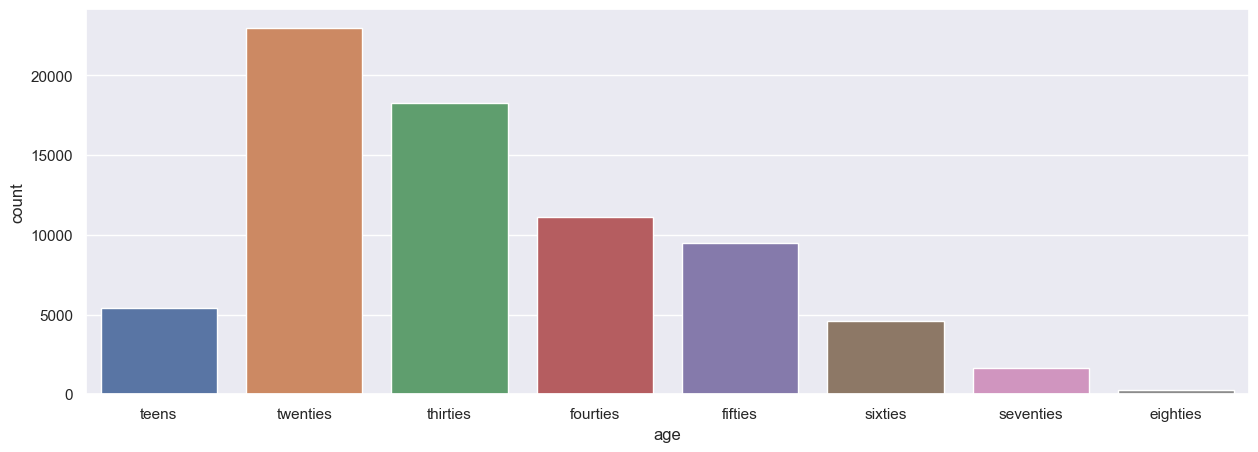

In [2]:
sns.set(rc={'figure.figsize':(15, 5)})
sns.countplot(x="age", 
        data=df[df['age'].notna()], 
        order=['teens', 'twenties', 'thirties', 'fourties', 'fifties', 'sixties', 'seventies', 'eighties'])

plt.show()

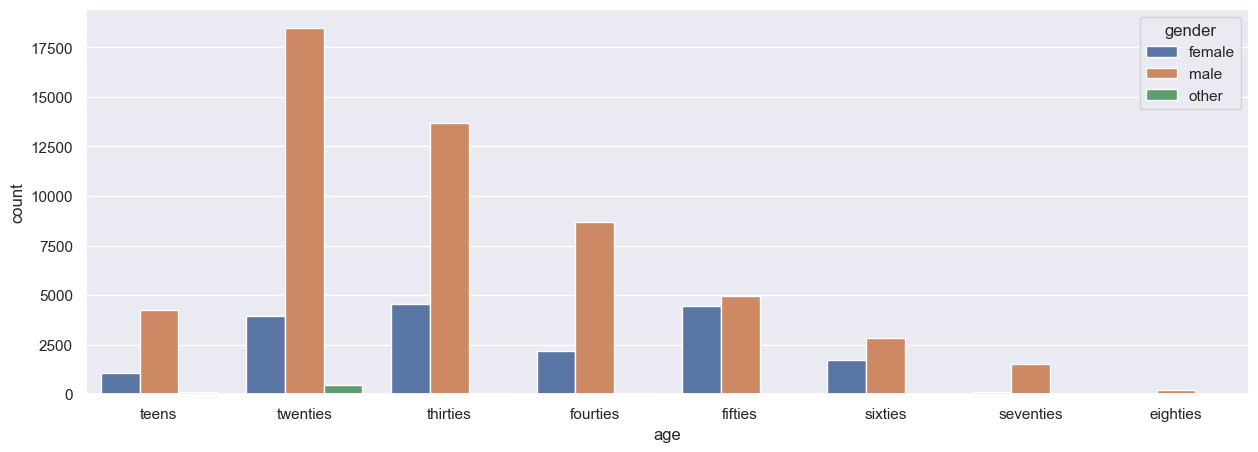

In [3]:
sns.countplot(x="age", 
        hue='gender',
        data=df[df['age'].notna()],
        order=['teens', 'twenties', 'thirties', 'fourties', 'fifties', 'sixties', 'seventies', 'eighties'])

plt.show()

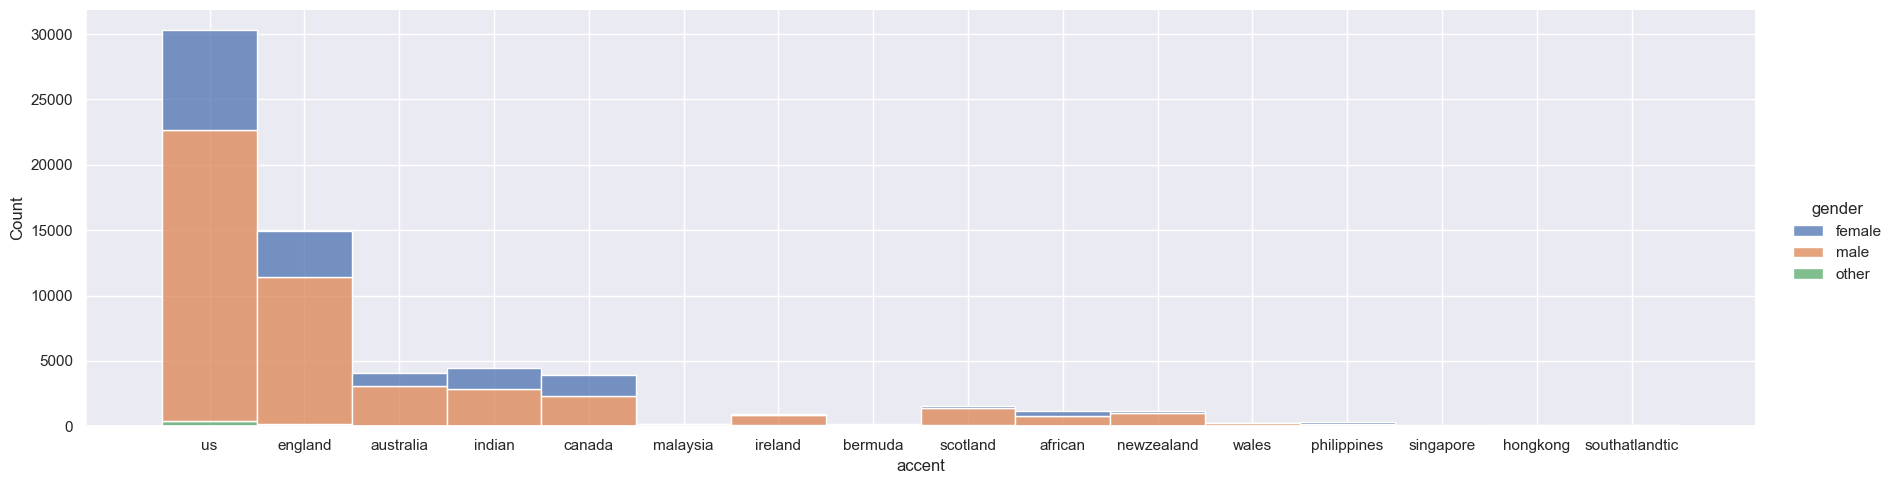

In [4]:
sns.displot(x="accent", 
        data=df[df['accent'].notna()], 
        hue='gender',
        multiple='stack',
        height=5, aspect=18/5)

plt.show()

initial: (195776, 8) final: (63163, 8)


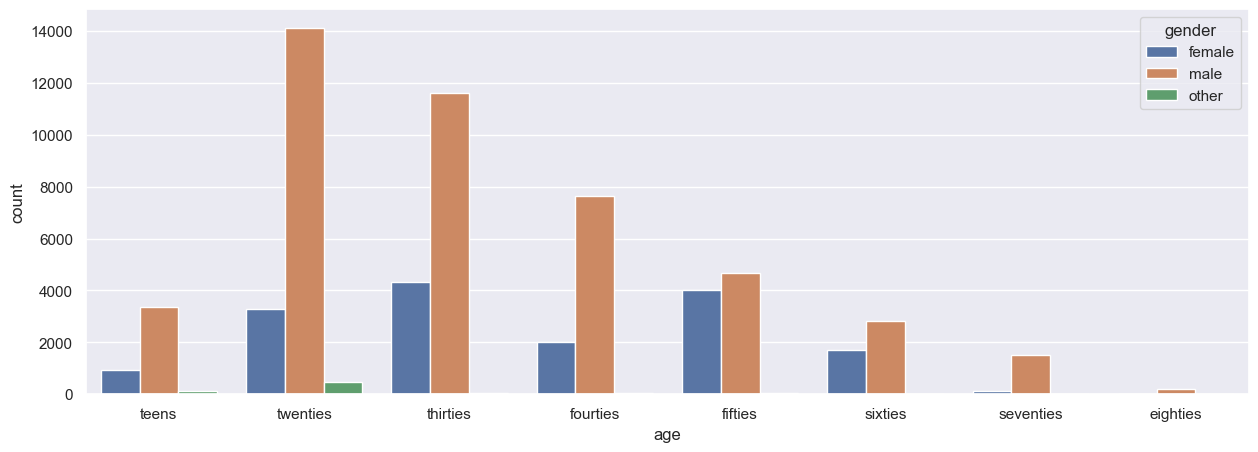

In [5]:
#del df['duration']
start=df.shape
#df.isna().sum()
end = df[df['age'].notna()& df['gender'].notna() & df['accent'].notna()].shape
print("initial: {} final: {}".format(start, end))
sns.countplot(x="age", 
        hue='gender',
        data=df[df['age'].notna()& df['gender'].notna() & df['accent'].notna()],
        order=['teens', 'twenties', 'thirties', 'fourties', 'fifties', 'sixties', 'seventies', 'eighties'])

plt.show()

In [6]:
#we extract the columns that we think useful are
df = df[['filename','age','gender']]
#To clean the data we remove the sample with NaN attribute values.
data = df[df['age'].notna() & df['gender'].notna()]
data.reset_index(inplace=True, drop=True)
data.head()

,filename,age,gender
0,cv-valid-train/sample-000005.mp3,twenties,female
1,cv-valid-train/sample-000008.mp3,seventies,male
2,cv-valid-train/sample-000013.mp3,thirties,female
3,cv-valid-train/sample-000014.mp3,sixties,male
4,cv-valid-train/sample-000019.mp3,fifties,male


In [7]:
cleanup_nums = {"gender": {"male":1,"female":0,"other":0.5}}
data = data.replace(cleanup_nums)
data.head()

,filename,age,gender
0,cv-valid-train/sample-000005.mp3,twenties,0.0
1,cv-valid-train/sample-000008.mp3,seventies,1.0
2,cv-valid-train/sample-000013.mp3,thirties,0.0
3,cv-valid-train/sample-000014.mp3,sixties,1.0
4,cv-valid-train/sample-000019.mp3,fifties,1.0


In [11]:
import librosa
from pydub import AudioSegment

ds_path = "./Dataset/cv-valid-train/"

#this function is used to extract audio frequency features
def feature_extraction(filename, sampling_rate=16000):
    path = "{}{}".format(ds_path, filename)
    features = list()
    audio, _ = librosa.load(path, sr=sampling_rate)
    
    gender = data[data['filename'] == filename].gender.values[0]
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=audio, sr=sampling_rate))
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=audio, sr=sampling_rate))
    spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=audio, sr=sampling_rate))
    features.append(gender)
    features.append(spectral_centroid)
    features.append(spectral_bandwidth)
    features.append(spectral_rolloff)
    
    mfcc = librosa.feature.mfcc(y=audio, sr=sampling_rate,n_mfcc=64,
                                n_mels=64, dct_type=2, norm='ortho')
    
    for el in mfcc:
        features.append(np.mean(el))
    
    return features
    
        
features = feature_extraction(data.iloc[0]['filename'])
print("features: ", features)

features:  [0.0, 1681.5324142474662, 1680.8059344170322, 3543.6304644808743, -386.6953, 58.885944, 20.434235, 28.430403, -6.5430713, -1.8048263, -12.135334, 1.6631132, -9.898734, -10.808863, -10.766384, -4.0387187, -4.3158565, -4.8547997, -6.6024103, 0.068421036, -6.143911, -7.418101, -2.4835248, -5.407408, -8.994128, -2.0870345, -8.330272, -3.299131, -3.0470412, -5.3508105, -2.589223, -2.548136, -2.0310395, -0.72022116, 0.8949827, 3.1764083, 2.9486763, 1.7587155, 3.542808, 2.0429277, -0.23521006, 0.8810463, 0.15345399, -0.63296175, -0.775728, -0.7923173, -0.97823197, 1.1871793, -0.048127335, -0.07115307, 0.8296228, -0.358257, -1.0317533, -0.79375035, -1.7965264, 0.31875592, -0.54056776, 0.109222665, -0.49991813, 0.07354187, -0.097709104, -0.25538903, -0.112463124, 0.34683302, 0.41897509, -0.3732702, 0.025088789, 0.42862463]


In [13]:
#the function create dataframe to store the feature and label related to each other
def create_df_features(orig):
    new_rows = list()
    tot_rows = len(orig)-1
    stop_counter = 73465
    
    for idx, row in orig.iterrows():
        if idx >= stop_counter: break
        print("\r", end="")
        print("{}/{}".format(idx, tot_rows), end="", flush=True)
        features = feature_extraction(row['filename'])
        features.append(row['age'])
        new_rows.append(features)

    return pd.DataFrame(new_rows, columns=["gender", "spectral_centroid", "spectral_bandwidth", "spectral_rolloff",
                                    "mfcc1", "mfcc2", "mfcc3", "mfcc4", "mfcc5", "mfcc6", "mfcc7", "mfcc8",
                                   "mfcc9", "mfcc10", "mfcc11", "mfcc12", "mfcc13", "mfcc14", "mfcc15", "mfcc16",
                                   "mfcc17", "mfcc18", "mfcc19", "mfcc20", "mfcc21", "mfcc22", "mfcc23", "mfcc24",
                                   "mfcc25", "mfcc26", "mfcc27", "mfcc28", "mfcc29", "mfcc30", "mfcc31", "mfcc32",
                                   "mfcc33", "mfcc34", "mfcc35", "mfcc36", "mfcc37", "mfcc38", "mfcc39", "mfcc40",
                                   "mfcc41", "mfcc42", "mfcc43", "mfcc44", "mfcc45", "mfcc46", "mfcc47", "mfcc48",
                                   "mfcc49", "mfcc50", "mfcc51", "mfcc52", "mfcc53", "mfcc54", "mfcc55", "mfcc56",
                                   "mfcc57", "mfcc58", "mfcc59", "mfcc60", "mfcc61", "mfcc62", "mfcc63", "mfcc64",
                                   "label"])

df_features = create_df_features(data)
df_features.head()

73464/73465

,gender,spectral_centroid,spectral_bandwidth,spectral_rolloff,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,...,mfcc56,mfcc57,mfcc58,mfcc59,mfcc60,mfcc61,mfcc62,mfcc63,mfcc64,label
0,0.0,1681.532414,1680.805934,3543.630464,-386.695312,58.885944,20.434235,28.430403,-6.543071,-1.804826,...,0.073542,-0.097709,-0.255389,-0.112463,0.346833,0.418975,-0.373270,0.025089,0.428625,twenties
1,1.0,2020.193756,1424.773657,3422.301136,-268.864960,63.284851,-18.909096,14.215420,2.823777,-4.745179,...,0.191393,-0.067001,-0.538642,-1.534495,0.447655,0.323265,0.421459,-0.223714,-0.135467,seventies
2,0.0,1843.096456,1346.455698,3167.880639,-218.650757,54.647396,-34.087723,35.585747,-18.367844,-9.931020,...,0.136874,-1.122960,-0.744736,-0.445227,0.899421,0.020074,-0.678399,0.074347,0.107994,thirties
3,1.0,1461.189465,1498.902592,2983.635355,-283.730316,76.660828,15.407807,28.268713,-7.024139,-7.843547,...,-0.098889,-0.226142,-0.197733,0.227836,0.318534,-0.278193,0.070605,0.006450,-0.108097,sixties
4,1.0,1446.691044,1643.481467,2918.068910,-178.925323,87.650063,14.496930,7.610833,11.074960,5.889675,...,-0.106049,-0.197205,0.174795,-0.111371,0.132505,0.000568,-0.081714,-0.298213,-0.127580,fifties


In [14]:
df_features.to_csv('features.csv', index=False)